## Importing Dependencies

In [1]:
# Importing dependencies
import matplotlib.pyplot as plt
import os
import pandas as pd
import psycopg2
from dotenv import load_dotenv
from sqlalchemy import create_engine

## Initializing variables to hold environment variables

In [2]:
# Loading homeowrk7.env so that the environment variables can be used in the engine object url
load_dotenv("homework7.env")
# Initializing variables to hold each environmet varaible
username=os.environ.get("USERNAME")
password=os.environ.get("PASSWORD")
host=os.environ.get("HOST")
port=os.environ.get("PORT")
database=os.environ.get("DATABASE")

## Creating the engine and connection resource

In [3]:
# Initializing a variable with the created engine
engine = create_engine(f"postgres+psycopg2://{username}:{password}@{host}:{port}/{database}")
# Initializing a variable with the connection resource
connection = engine.connect()

## Building the query string and querying the database

In [4]:
# Initializing a varaibel to hold a query string that will return the average salary per PH job title
query_string = """SELECT titles.title, AVG(salary.salary) FROM titles JOIN salary 
                  ON salary.emp_no = titles.emp_no GROUP BY titles.title;"""

In [5]:
# Initializing a variable with the returned table
salary_by_title_df = pd.read_sql(query_string, connection)
# Displaying salary_by_title_df
display(salary_by_title_df)

,title,avg
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


## Plotting the output of the query

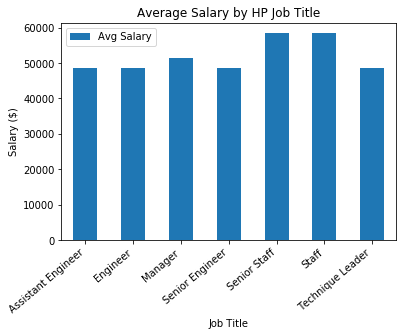

In [6]:
# Creating a plot to compare the average salaries of each PH job title
ax = salary_by_title_df.plot.bar(x="title", y="avg")
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=40, ha="right")
ax.set_title("Average Salary by HP Job Title")
ax.set_xlabel("Job Title")
ax.set_ylabel("Salary ($)")
ax.legend(["Avg Salary"])
plt.show()

## Building a query for the search suggested by the manager in the "Epilogue" portion of this assignment

In [7]:
query_string = """SELECT titles.title, salary.salary FROM titles JOIN salary 
                  ON salary.emp_no = titles.emp_no WHERE titles.emp_no=499942;"""

In [8]:
my_salary_title = pd.read_sql(query_string, connection)

In [9]:
my_salary_title

,title,salary
0,Technique Leader,40000
